# UPPGIFT 1

# A

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go

covid_stats = pd.read_excel("../Data/Covid19.xlsx", sheet_name="Veckodata Riket")


In [3]:
# alla kolumner int eller float
# Antal_avlidna_milj_inv_vecka - float
# Kum_antal_avlidna_milj_inv - float
# resten int

covid_stats.info()

# 13 kolumner
# 142 rader

# covid_stats.describe()
# covid_stats.value_counts()
# covid_stats.columns
# covid_stats.index


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

# 1B
- Slår ihop kolumnerna, samt lägger till ett "v" emellan för att få veckorna.
- gör till en lista för att visa hur formatet är detsamma som i uppgiften

In [4]:
# Måste det stå "Vecka" överst?
covid_stats["Vecka"] = covid_stats['år'].astype(str) + "v" + covid_stats["veckonummer"].astype(str)
covid_stats["Vecka"].reset_index(drop=True,inplace=True)
covid_stats["Vecka"]

0       2020v6
1       2020v7
2       2020v8
3       2020v9
4      2020v10
        ...   
137    2022v38
138    2022v39
139    2022v40
140    2022v41
141    2022v42
Name: Vecka, Length: 142, dtype: object

# 1C

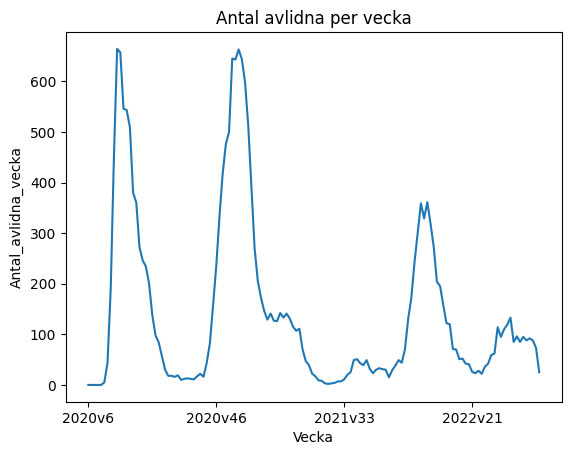

In [5]:

weeknumbers = covid_stats['Vecka']
deaths_per_week = covid_stats["Antal_avlidna_vecka"]

ax = plt.axes()
sns.lineplot(x = weeknumbers, y = deaths_per_week, ax = ax)
ax.set(title = "Antal avlidna per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

# 1D

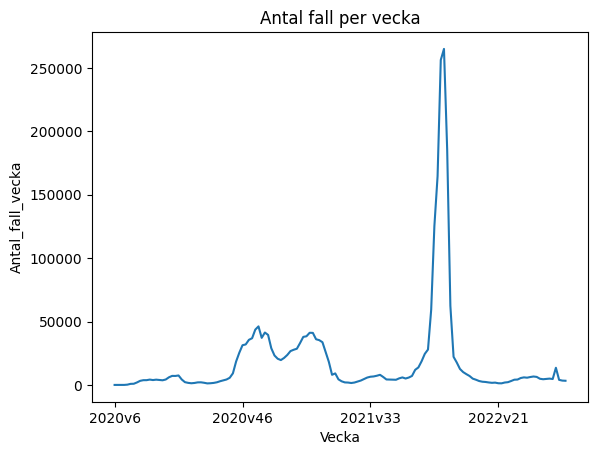

In [6]:
weeknumbers = covid_stats['Vecka']
incidents_week = covid_stats["Antal_fall_vecka"]

ax = plt.axes()
sns.lineplot(x = weeknumbers, y = incidents_week, ax = ax)
ax.set(title = "Antal fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

# 1E

In [ ]:
ax = plt.subplots(2,2, figsize=(16,8))
sns.lineplot(x = weeknumbers, y = deaths_per_week, ax = ax)
sns.lineplot(x = weeknumbers, y = incidents_week, ax = ax)
ax.set(title = "Avlidna & fall per vecka")
ax.set_yscale("log")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

# 1F

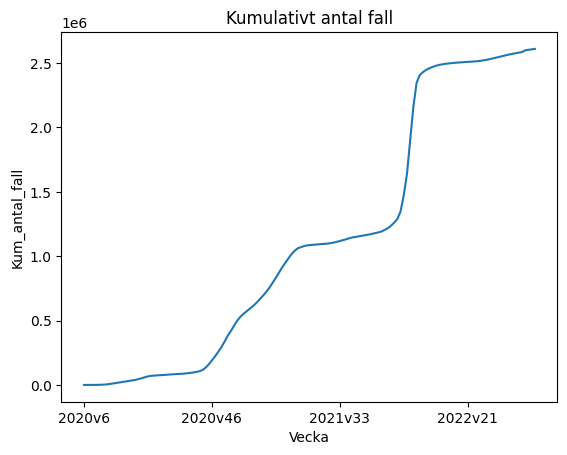

In [9]:
kum_antal_fall = covid_stats["Kum_antal_fall"]

ax = plt.subplot()
sns.lineplot(x = weeknumbers, y = kum_antal_fall, ax = ax)
ax.set(title = "Kumulativt antal fall")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

# UPPGIFT 2

# A

In [10]:
vaccin = pd.read_excel("../Data/vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")

len(vaccin["Län"].drop_duplicates())

# Det är alltså 21 län representerade

21

# B

In [11]:
len(vaccin["Kommun"].drop_duplicates())

# 290 kommun representerade

290

# C

In [12]:
sum(vaccin["Befolkning"])

# 9,092,790 personer är representerade i datasetet

9092790

# D

In [ ]:

demo_pop = [] # Skapar en lista som jag lägga till alla värden i

# Loop som lägger ihop befolkningsnummrerna för varje åldersgrupp
# Läggs över i en lista som kan användas för plotting
for i in range(10):
    x = sum(vaccin["Befolkning"].iloc[i::10])
    demo_pop.append(x)

# sum(demo_pop) # kollade så att summan av det här var detsamma som på tidigare uppgiften

# Plockar ut alla åldersgrupper så vi kan använda dem för att plotta
demo_age = []

for i in range(10):
    x = vaccin["Ålder"].iloc[i]
    demo_age.append(x)

vaccin[(vaccin["Ålder"] == "12-15")]

In [26]:
fig = px.bar(
    vaccin,
    x=demo_age,
    y=demo_pop,
    title="Fördelning av befolkning"
)
fig.show()

# F

In [ ]:
vaccin.info()

In [84]:
vaccin["Län_namn"].unique()

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 17, 18, 19, 20, 21,
       22, 23, 24, 25], dtype=int64)

In [93]:
# new = vaccin.iloc[0:, 1::3]

län = vaccin["Län_namn"]
new_län = []

for i in län:
    c = vaccin.loc[vaccin["Län"] == i, "Antal minst 1 dos"]
    new_län.append(c)

new_län

[Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], Name: Antal minst 1 dos, dtype: int64),
 Series([], 

In [38]:
dos1 = vaccin["Antal minst 1 dos"]
dos2 = vaccin["Antal minst 2 doser"]
dos3 = vaccin["Antal 3 doser"]
pop = vaccin["Befolkning"]

fig = px.bar(
    vaccin,
    x=dos1,
    y=dos2,
    title="Fördelning av befolkning"
)
fig.show()